In [2]:
# importing required libraries
import numpy as np   #numpy for dealing with array 
import matplotlib.pyplot as plt  # matplot for ploating graphs
import pandas as pd  # pandas for dataframe
import sklearn  #sklearn for min_max scaler normalization

In [3]:
data = pd.read_csv(r"C:\Users\srija\Assignment\AAPL_1min.txt", sep=" ", header=None) #imorting data from the computer and converting csv to dataframe
data.columns = ["date time", "open"]     # checking the data

In [4]:
data

,date time,open
0,2005-01-03,"08:00:00,0.9939,0.9944,0.9939,0.9944,39200"
1,2005-01-03,"08:02:00,0.9863,0.9863,0.9863,0.9863,304360"
2,2005-01-03,"08:03:00,0.9955,0.9956,0.9955,0.9956,16800"
3,2005-01-03,"08:04:00,0.9962,0.9985,0.9962,0.9985,161504"
4,2005-01-03,"08:07:00,0.9971,0.9971,0.997,0.997,50400"
...,...,...
2743498,2022-02-25,"19:54:00,164.31,164.31,164.31,164.31,350"
2743499,2022-02-25,"19:55:00,164.32,164.32,164.32,164.32,100"
2743500,2022-02-25,"19:57:00,164.38,164.38,164.38,164.38,422"
2743501,2022-02-25,"19:58:00,164.34,164.34,164.33,164.33,557"


In [5]:
data1 = data['open']
data2 = data['date time']
elem = data1[4]

closing = [] #making a list for closing price

elem

'08:07:00,0.9971,0.9971,0.997,0.997,50400'

In [6]:
for elem in data1:
    val1= ''
    
    count=0
    for elem1 in elem :
        if(count==4):  #accesing closing price from the open column
            val1 = val1+elem1
        if(elem1==","):
            count = count+1
     
      
        if(count==5):
            break
    val1 = val1[0:-1]
  
    closing.append(float(val1))

In [7]:
len(closing)

2743503

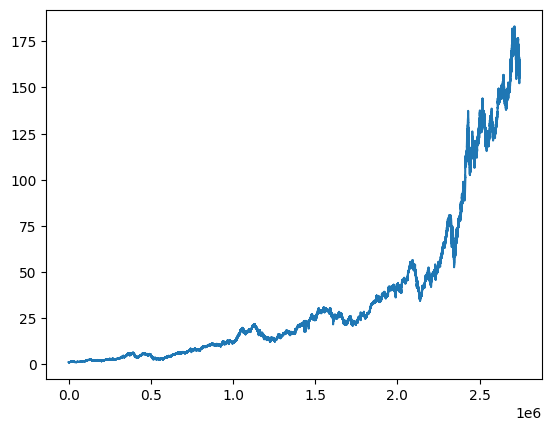

In [8]:
plt.plot(closing) #lets plot the closing price
plt.show()

In [9]:
closing_day = []


In [10]:
#similar to closing price every minute i am separating closing price very day

for i in range(0,len(data1)-1):
    if(data2[i]!=data2[i+1]): #Only taking value value when the next closing price is not in same day so that we will get clsoing price for the day
        count=0
        val1=""
        for elem1 in data1[i] :
            if(count==4):
                val1 = val1+elem1
            if(elem1==","):
                count = count+1


            if(count==5):
                break
        val1 = val1[0:-1]
        
        
        closing_day.append(float(val1))
   

        
    
    

In [11]:
closing_day

[0.9649,
 0.9825,
 0.9884,
 0.9861,
 1.062,
 1.0548,
 0.9984,
 1.1208,
 1.0641,
 1.0734,
 1.0796,
 1.0597,
 1.0814,
 1.0811,
 1.0851,
 1.1049,
 1.1036,
 1.1094,
 1.1331,
 1.1748,
 1.1897,
 1.2126,
 1.1898,
 1.2056,
 1.2094,
 1.2372,
 1.208,
 1.1988,
 1.2446,
 1.295,
 1.3545,
 1.3822,
 1.3435,
 1.3303,
 1.3027,
 1.3545,
 1.3602,
 1.362,
 1.3686,
 1.3609,
 1.3493,
 1.2799,
 1.3095,
 1.305,
 1.2435,
 1.2034,
 1.2251,
 1.2349,
 1.2309,
 1.2551,
 1.2585,
 1.2967,
 1.3181,
 1.338,
 1.3083,
 1.2942,
 1.3022,
 1.3059,
 1.2799,
 1.3089,
 1.2747,
 1.2508,
 1.2579,
 1.2796,
 1.2994,
 1.338,
 1.3377,
 1.2906,
 1.3074,
 1.2401,
 1.1193,
 1.0783,
 1.0936,
 1.1517,
 1.0906,
 1.1319,
 1.0854,
 1.1316,
 1.1043,
 1.1007,
 1.0921,
 1.1062,
 1.1108,
 1.1086,
 1.1355,
 1.1212,
 1.1401,
 1.1297,
 1.09,
 1.0875,
 1.049,
 1.063,
 1.0866,
 1.0857,
 1.0955,
 1.1465,
 1.1475,
 1.2209,
 1.2135,
 1.2181,
 1.2456,
 1.241,
 1.2184,
 1.2353,
 1.227,
 1.1704,
 1.1557,
 1.1175,
 1.1273,
 1.145,
 1.0906,
 1.0964,
 1.115

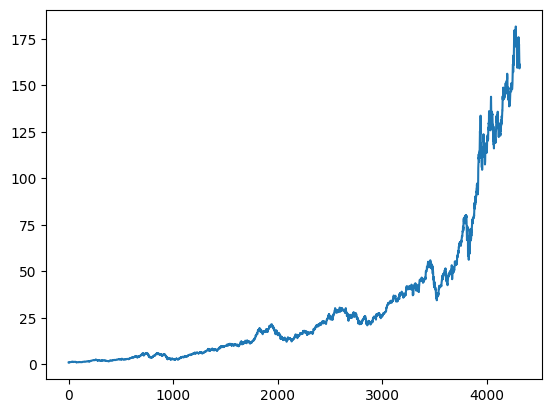

In [12]:
plt.plot(closing_day) #lets plot the closing_day
plt.show()

In [13]:
len(closing_day)

4316

In [14]:
closing_day = closing_day[int(0.4*len(closing_day)):]   # we drop 40% of data (from last years)

In [15]:
len(closing_day)

2590

In [16]:
#https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632

In [63]:
# I tried normalizing using min-max scaler and QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train1  = scaler.fit_transform(np.array(closing_day).reshape(-1,1))

# I choose Minmax scaler because the upper bound is shifted too much to the right

# from sklearn.preprocessing import QuantileTransformer

# # Instantiate the QuantileTransformer with desired parameters
# scaler = QuantileTransformer(output_distribution='uniform')

# # Reshape the 'close' prices if necessary (usually not required)


# # Fit and transform the 'close' prices using the QuantileTransformer
# train1 = scaler.fit_transform(np.array(closing_day).reshape(-1,1))

In [64]:
len(train1)

2590

In [65]:
def split_data(stock, lookback):   # this function will split the closing price into X_train -> features for training
                                   # y_train -> target of traing , X_test ->feature for testing , y-> test actual stock price to predict
    #data_raw = stock.to_numpy() # convert to numpy array
    data_raw = stock
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));  # taking 20% for testing
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]
lookback = 7 # choose sequence length
X_train, y_train, X_test, y_test = split_data(train1, lookback)

In [66]:
X_train[len(X_train)-1]

array([[0.39963972],
       [0.4020197 ],
       [0.40122657],
       [0.37894441],
       [0.37887231],
       [0.39286146]])

In [67]:
print(X_train.shape)

(2066, 6, 1)


In [68]:
print(y_train.shape)

(2066, 1)


In [69]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [70]:
import torch # importing torch for training model
import torch.nn as nn
import torch.optim as optim

In [71]:
# here we converting each list to tensor so that we can feed it to the model
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [72]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [73]:
#initializing important paramerts for training
input_dim = 1 
hidden_dim = 64   # hidden layer is set to 64 because error was less
num_layers = 2
output_dim = 1
num_epochs = 200   # training on 200 epochs to minimize error

In [74]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim): 
       # In the constructor (__init__ method), the code initializes the LSTM model with the following parameters
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    def forward(self, x): #The forward method defines the forward pass of the model. It takes an input tensor x and performs the
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [75]:
 #initialize lstm model with appropriate parameters 
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

Training Time

In [76]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.048461951315402985
Epoch  1 MSE:  0.009861310943961143
Epoch  2 MSE:  0.009014120325446129
Epoch  3 MSE:  0.007009712513536215
Epoch  4 MSE:  0.008861790411174297
Epoch  5 MSE:  0.007894893176853657
Epoch  6 MSE:  0.006520562805235386
Epoch  7 MSE:  0.006681807804852724
Epoch  8 MSE:  0.007438965141773224
Epoch  9 MSE:  0.007158043794333935
Epoch  10 MSE:  0.00638389540836215
Epoch  11 MSE:  0.006139580626040697
Epoch  12 MSE:  0.0063855526968836784
Epoch  13 MSE:  0.006567791104316711
Epoch  14 MSE:  0.006372474599629641
Epoch  15 MSE:  0.005924050230532885
Epoch  16 MSE:  0.005577202886343002
Epoch  17 MSE:  0.005541033111512661
Epoch  18 MSE:  0.005583257880061865
Epoch  19 MSE:  0.005278403405100107
Epoch  20 MSE:  0.004671601578593254
Epoch  21 MSE:  0.004185262136161327
Epoch  22 MSE:  0.003876562463119626
Epoch  23 MSE:  0.0032282345928251743
Epoch  24 MSE:  0.0020451312884688377
Epoch  25 MSE:  0.0013803433394059539
Epoch  26 MSE:  0.0004326780035626143
Epoch  

In [77]:
# with torch.no_grad():
#     for i in range(0,len(X_test)):
        
#         predicted = model(X_train[len(X_train)-2:len(X_train)-1].to(device)).to('cpu')
#         xxx = predicted.item()
#         y_predicted.append(xxx)
        
#         train1 = np.append(train1,xxx)
#         train1  = scaler.fit_transform(np.array(train1).reshape(-1,1))
#         X_train, y_train, X_test, y_testt = split_data(train1, lookback)
#         X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#         X_train = torch.tensor(X_train, dtype=torch.float32)
        
        
        
        
        

# plt.plot(train1, label='Actual Close')
# plt.plot(y_predicted, label='Predicted Close')
# plt.xlabel('Day')
# plt.ylabel('Close')
# plt.legend()
# plt.show()


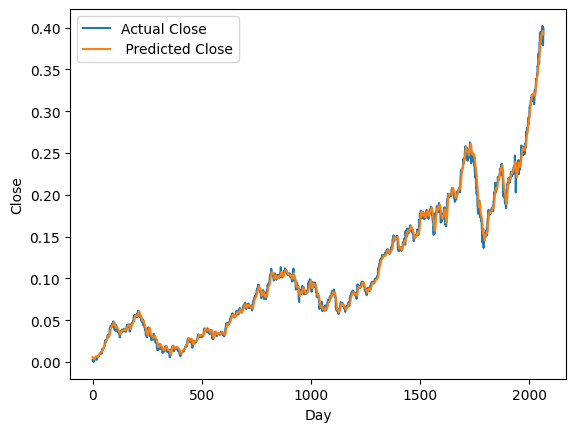

In [78]:
with torch.no_grad():  #to tell pytorch not to calculate the gradient
   
        
    predicted= model(X_train.to(device)).to('cpu') # making prediction
       
        
        
        #ploting the data on train dataset

plt.plot(y_train, label='Actual Close')
plt.plot(predicted,label =' Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


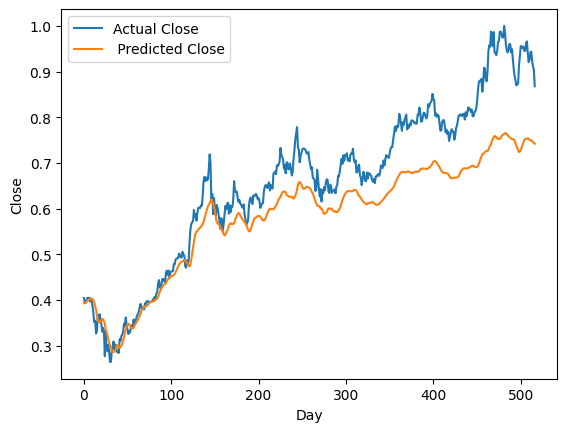

In [79]:
# Similar to above but for test data set
with torch.no_grad():
   
        
    predicted= model(X_test.to(device)).to('cpu')
       
        
        
        

plt.plot(y_test, label='Actual Close')
plt.plot(predicted,label =' Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [80]:
# reversing the normalized value to original value
original_data = scaler.inverse_transform(predicted[0].reshape(-1,1))
ori = original_data[0]
ori[0]

78.14989218120574

In [81]:
original_data1 = scaler.inverse_transform(y_test.reshape(-1,1))
original_data1[0][0]




80.0814005442977

In [82]:
predicted[0]

tensor([0.3926])

I am take $100K and trade this on the testing period I will trade weekly (i.e after every 1 data points) I will buy all stock or hold my share if predicted will be grater than current price and sell all stocks if predicted will be less than than current price. 

In [83]:
investment  = 100000


gap_days = 1
no_of_shares = 0

brokerage = 0.0005 # let brokearge be 0.05% per trade (buy or sell)


In [84]:
current_closing =  X_train[len(X_train)-1][5]
current_closing = scaler.inverse_transform(current_closing.reshape(-1,1))
current_closing[0][0]

78.18700000739693

In [85]:
tommorow_predicted_closing = predicted[0]
tommorow_predicted_closing = scaler.inverse_transform(tommorow_predicted_closing.reshape(-1,1))
tommorow_predicted_closing[0][0]

78.14989218120574

In [86]:
len(y_test)

517

In [87]:
len(predicted)

517

In [88]:
orders = [] # list of orders

Trading strategy module

In [89]:
def Portfolio(investment,gap_days,no_of_stocks,predicted,y_test,brokerage,orders):
            current_price = 78.18699814186292 #initial current price before testing period
            current_price_pred = current_price
            for elem in range(0,len(predicted)):

                    predicted1 = predicted[elem]
                    predicted1 = scaler.inverse_transform(predicted1.reshape(-1,1)) # predcited price


                    Actual_price = y_test[elem]
                    Actual_price= scaler.inverse_transform(Actual_price.reshape(-1,1))



                    if(elem%gap_days==0):  # execute trade after every specific day

                            if(current_price_pred<predicted1):  # Buy if current price less than predicted
                                if(investment>current_price):
                                          investment = investment*(1-brokerage)
                                          no_of_stocks = no_of_stocks + int(investment/current_price)
                                          investment =  investment%current_price
                                          
                                           
                                          orders.append("Buy")

                            if(current_price_pred>predicted1): # Sell if current price less than predicted
                                    investment = investment + no_of_stocks*current_price*(1-brokerage)
                                
                                    no_of_stocks = 0
                                     #print("Sell")
                                    orders.append("Sell")


                    current_price = Actual_price
                    current_price_pred = predicted1
                        
                        
                        
            portfolio = investment + no_of_stocks*current_price

            return (portfolio,investment,no_of_stocks,orders)     # return total portfolio ,investment , no_of_stock orders   

                    
              
            
        
     
        
        

In [90]:
x = Portfolio(investment,gap_days,no_of_shares,predicted,y_test,brokerage,orders)
x[0]

array([[155280.80986641]])

Total 55.2% return 

In [95]:
x[3]

['Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 'Buy',
 'Sell',
 'Sell',
 'Sell',
 'Sell',
 '

References 
https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632
and CHATGPT

